In [2]:
import pandas as pd
import requests 
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

%matplotlib inline

# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive = pd.read_csv('./twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
data =[]
for line in open('tweet_json.json', 'r'):
    data.append(json.loads(line))

In [6]:
twitter_api=pd.DataFrame(data)
twitter_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues

#### `twitter acrchive` table

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, expanded_urls columns all have NaN/missing values
- in_reply_to_status_id,in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, columns all have wrong datatypes
- row 1515 under the 'expanded_url' column within the twitter archive table has a url that isn't related to or connected to twitter
- name,doggo,floofer,pupper,puppo columns have some values represented as 'None' instead of 'NaN' to indicate that no data is available or was given for that field

#### `twitter api` table

- extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,possibly_sensitive,possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status columns all have NaN/missing values
- created_at,id,in_reply_to_status_id,quoted_status_id all have wrong data types
- some rows (e.g 108,580,893) under the 'retweeted_status' column have values that should be in the 'created_at' column

### Tidiness issues 
- Some columns (e.g tweet_id, in_reply_to_status_id,in_reply_to_user_id & source are present in more than one table
- 'display_text_range' column within the twitter_api table has two variables for text range that should each have a seperate column 



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [7]:
# Make copies of original pieces of data
image_predictions_clean = image_predictions.copy()
twitter_archive_clean = twitter_archive.copy()
twitter_api_clean = twitter_api.copy()

### Issue #1: Missing Data 

`twitter_archive`: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, expanded_urls columns all have NaN/missing values

#### Define: 
Remove all the listed columns with 'NaN' values.

#### Code

In [8]:
twitter_archive_clean.dropna(axis = 1, inplace = True)

#### Test

In [9]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #2: Wrong Data Type

`twitter_archive`: timestamp column has a wrong datatype

#### Define

Convert the wrong data type to the correct data type for the listed column using pd.datetime method.

#### Code

In [10]:
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

#### Test

In [11]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


### Issue #3: Inaccurate data 
`twitter_archive`: name,doggo,floofer,pupper,puppo columns have some values represented as 'None' instead of 'NaN' to indicate that no data is available or was given for that field

#### Define

Convert 'None' to 'NaN' within the listed columns and drop those values using the dropna method

#### Code

In [12]:
twitter_archive_clean.name.replace('None', np.nan, inplace=True)
twitter_archive_clean.doggo.replace('None', np.nan, inplace=True)
twitter_archive_clean.floofer.replace('None', np.nan, inplace=True)
twitter_archive_clean.pupper.replace('None', np.nan, inplace=True)
twitter_archive_clean.puppo.replace('None', np.nan, inplace=True)

In [13]:
twitter_archive_clean.dropna(axis = 1, inplace = True)

#### Test

In [14]:
twitter_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
dtype: int64

### Issue #4: Missing Data

`twitter_api_clean`:extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,possibly_sensitive,possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status columns all have NaN/missing values

#### *Define* 

Remove all the listed columns with 'NaN' values.

#### *Code* 

In [15]:
twitter_api_clean.dropna(axis=1, inplace = True)

#### *Test* 

In [16]:
twitter_api_clean.isnull().sum()

created_at            0
id                    0
id_str                0
full_text             0
truncated             0
display_text_range    0
entities              0
source                0
user                  0
is_quote_status       0
retweet_count         0
favorite_count        0
favorited             0
retweeted             0
lang                  0
dtype: int64

### Issue #5: Wrong Data Types

`twitter_api_clean`: created_at,id_str,in_reply_to_status_id,quoted_status_id all have wrong data types

#### *Define* 

Convert created_at & id_str data type to the correct one using the pd.to_numeric & pd.to_datetime function

#### *Code* 

In [17]:
twitter_api_clean['created_at'] = pd.to_datetime(twitter_api_clean['created_at'])

In [18]:
twitter_api_clean['id_str'] = pd.to_numeric(twitter_api_clean['id_str'])

#### *Test* 

In [19]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2354 non-null   datetime64[ns, UTC]
 1   id                  2354 non-null   int64              
 2   id_str              2354 non-null   int64              
 3   full_text           2354 non-null   object             
 4   truncated           2354 non-null   bool               
 5   display_text_range  2354 non-null   object             
 6   entities            2354 non-null   object             
 7   source              2354 non-null   object             
 8   user                2354 non-null   object             
 9   is_quote_status     2354 non-null   bool               
 10  retweet_count       2354 non-null   int64              
 11  favorite_count      2354 non-null   int64              
 12  favorited           2354 non-null 

In [27]:
all_columns = pd.Series(list(twitter_api_clean) + list(image_predictions_clean) + list(twitter_archive))
all_columns[all_columns.duplicated()]

27    tweet_id
31      source
dtype: object

In [28]:
twitter_api_clean.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en


In [29]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10


In [30]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [31]:
twitter_archive_master = pd.merge(twitter_archive_clean,image_predictions_clean, on = 'tweet_id')

In [32]:
twitter_archive_master = pd.merge(twitter_archive_master,twitter_api_clean, left_on = 'tweet_id', right_on = 'id')


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [33]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

- Which tweet_id has the hightest retweet ?
- Which tweet_id was most liked ?
- What dog breed had the most liked tweet within the 'p1' column?
- Visualization - What dog breed had the most mention in 'p3' column

# Insight 1

In [34]:
# Checking for tweet_id with the highest retweet
highest_retweet = twitter_archive_master.retweet_count.max()
highest_retweet

79515

In [35]:
highest_retweet = twitter_archive_master.query('retweet_count == 79515')
highest_retweet

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,jpg_url,img_num,p1,p1_conf,...,display_text_range,entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
851,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,...,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,79515,131075,False,False,en


# Insight 2 & 3

In [36]:
# Checking for the tweet_id that was most liked/favorited

most_liked = twitter_archive_master.favorite_count.max()
most_liked

132810

In [37]:
most_liked = twitter_archive_master.query('favorite_count == 132810')
most_liked

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,jpg_url,img_num,p1,p1_conf,...,display_text_range,entities,source_y,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
329,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,...,"[0, 87]","{'hashtags': [{'text': 'WomensMarch', 'indices...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,48265,132810,False,False,en


### Insights:


1. tweet id 744234799360020481 had the highest retweet 

2. tweet id 822872901745569793 was the most liked 

3. 'Lakeland_terrier' from column 'p1 is the dog with the most liked/favorited tweet

### Visualization

In [38]:
base_color = sb.color_palette()[0]

In [39]:
gen_order = twitter_archive_master['p1'].value_counts().index

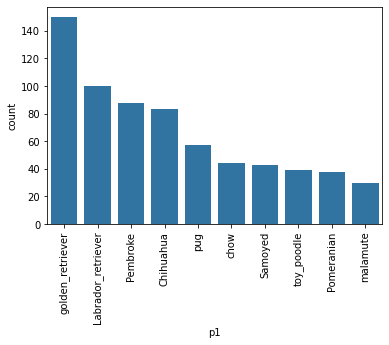

In [40]:
sb.countplot(x = 'p1', data = twitter_archive_master,  color = base_color, order = gen_order[:10]);
plt.xticks(rotation = 90);

'Golden retriever' had the most counts within the 'p1' column

In [41]:
# filtering data by rows where the algorithm's prediction is equal to or greater than 95% and the prediction is a 
# breed of dog and the tweet wasn't retweeted

filtered_df=twitter_archive_master.query('(p1_conf>=0.95) and  (p1_dog==True) and (retweeted==False)').copy()

In [45]:
gen_order = filtered_df['p1'].value_counts().index

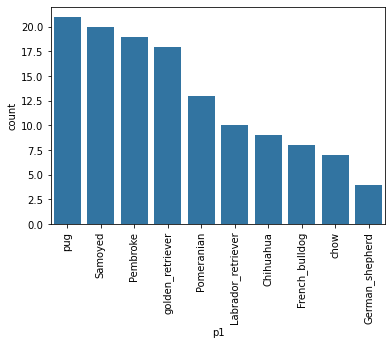

In [46]:
sb.countplot(x = 'p1', data = filtered_df,  color = base_color, order = gen_order[:10]);
plt.xticks(rotation = 90);

In [47]:
# filtering data by rows where the algorithm's prediction is equal to or greater than 90% and the prediction is a 
# breed of dog and the tweet wasn't retweeted

filtered_df_1=twitter_archive_master.query('(p1_conf>=0.90) and  (p1_dog==True) and (retweeted==False)').copy()

In [48]:
gen_order = filtered_df_1['p1'].value_counts().index

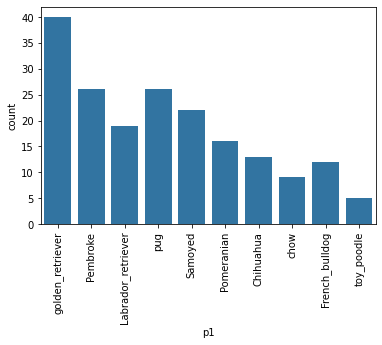

In [62]:
sb.countplot(x = 'p1', data = filtered_df_1,  color = base_color, order = gen_order[:10]);
plt.xticks(rotation = 90);